In [15]:
import sys
import os
import math
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

def abort(user_input):
    if user_input.lower() == "abort" or user_input.lower() == "exit":
        sys.exit("Program aborted.")
    else:
        return user_input

class Matrix_File_Metadata:
    def __init__(self, input_files):
        self.input_files = input_files

    def __str__(self):
        return str(self.input_files)

    def get_metadata(self):
        chromosomes = []
        metrics = []
        for i in self.input_files:
            if len(chromosomes) == 0:
                chromosomes.append(
                    abort(
                        input(f"Please input the CHROMOSOME name in the file '{i}': ")
                    )
                )
            else:
                chromosome_already_labeled = False
                for c in chromosomes:
                    if c in i:
                        chromosome_already_labeled = True
                if chromosome_already_labeled:
                    pass
                else:
                    chromosomes.append(
                        abort(
                            input(
                                f"Please input the CHROMOSOME name in the file '{i}': "
                            )
                        )
                    )

            if len(metrics) == 0:
                metrics.append(
                    abort(input(f"Please input the METRIC name in the file '{i}': "))
                )
            else:
                metric_already_labeled = False
                for m in metrics:
                    if m in i:
                        metric_already_labeled = True
                if metric_already_labeled:
                    pass
                else:
                    metrics.append(
                        abort(
                            input(f"Please input the METRIC name in the file '{i}': ")
                        )
                    )

        return (chromosomes, metrics)


# Create object class Matrix_File
class Matrix_File:
    def __init__(self, filepath):
        self.filepath = filepath

    def get_name(self, chromosomes, metrics):
        chromosome = []
        metric = []

        for i in chromosomes:
            if i in self.filepath:
                chromosome.append(i)
        for i in metrics:
            if i in self.filepath:
                metric.append(i)

        if len(chromosome) + len(metric) != 2:
            sys.exit(
                f"File {self.filepath} does not contain exactly one chromosome and one metric name."
            )
        else:
            chromosome = "".join(chromosome)
            metric = "".join(metric)

        self.chromosome = chromosome
        self.metric = metric

        return chromosome, metric

    def get_data(self):
        data = []
        with open(self.filepath, "r") as f:
            while True:
                line = f.readline()
                row = line.strip("\n").split("\t")
                if line:
                    data.append(row)
                else:
                    break

        row_lengths = {len(row) for row in data}
        if len(row_lengths) > 1 or row_lengths == {1}:
            sys.exit(f"Delimiter issues. Rows read have length(s) {row_lengths}")
        labels = np.array(data[0][1:])

        data_dims = len(data) - 1
        data_array = np.zeros((data_dims, data_dims))

        for i in range(data_dims):
            if data[i + 1][0] != labels[i]:
                sys.exit("Matrix axes are unaligned. Perhaps the Y axis is inverted?")
            for j in range(data_dims):
                try:
                    data_array[i][j] = data[i + 1][j + 1]
                except ValueError:
                    data_array[i][j] = (
                        0.0  # this position contains "" in the input data
                    )
        
        chromosome_tag = self.chromosome
        for i, label in enumerate(labels):
            label_terms = label.split("_")
            label_terms_lower = label.lower().split("_")
            while chromosome_tag not in label_terms:
                chromosome_tag = str(
                    abort(
                        input(
                            f"The matrix row/column labels do not match the chromosome tag '{chromosome_tag}' in the file name '{self.filepath}'. From the matrix data label '{label}', what characters represent the chromosome name? "
                        )
                    )
                )

            label_terms.pop(label_terms.index(chromosome_tag))
            label_trim = "_".join(label_terms)
            labels[i] = label_trim

        return data_array, labels



In [8]:
import os
os.chdir("GeneticDistance_output")

In [9]:
input_files = [f for f in os.listdir() if f.endswith(".tsv")]
input_files_metadata = Matrix_File_Metadata(input_files)
chromosomes, metrics = input_files_metadata.get_metadata()

for input_file in input_files:
    fileobject = Matrix_File(input_file)
    chromosome, metric = fileobject.get_name(chromosomes, metrics)
    data, labels = fileobject.get_data()

Please input the CHROMOSOME name in the file 'yDNA_alignment_result.tsv':  yDNA
Please input the METRIC name in the file 'yDNA_alignment_result.tsv':  alignment
Please input the CHROMOSOME name in the file 'mtDNA_identity_result.tsv':  mtDNA
Please input the METRIC name in the file 'mtDNA_identity_result.tsv':  identity
The matrix row/column labels do not match the chromosome tag 'yDNA' in the file name 'yDNA_alignment_result.tsv'. From the matrix data label 'Prince Fred_Y', what characters represent the chromosome name?  Y
The matrix row/column labels do not match the chromosome tag 'yDNA' in the file name 'yDNA_identity_result.tsv'. From the matrix data label 'Prince Fred_Y', what characters represent the chromosome name?  Y


In [50]:
print(chromosome, metric)
print(labels)
print(data)
distvec = pdist(data)
linkvec = linkage(data)
print(distvec)
print(linkvec)
#m = squareform(distvec)
#print(squareform(m))
#print(linkage(data, "complete"))
dendrogram(distvec, labels=labels, orientation="left")
#plt.show()

yDNA identity
['Prince Fred' 'Nicolas II Romanov' 'Alexei Romanov' 'Anastasia4 son'
 'Farmers grandson' 'Grigori Rasputin']
[[0.     0.8504 0.7664 0.7336 0.7    0.6336]
 [0.8504 0.     0.5648 0.8336 0.7936 0.7664]
 [0.7664 0.5648 0.     0.8336 0.7224 0.6832]
 [0.7336 0.8336 0.8336 0.     0.7664 0.7336]
 [0.7    0.7936 0.7224 0.7664 0.     0.3   ]
 [0.6336 0.7664 0.6832 0.7336 0.3    0.    ]]
[1.23426078 1.12661759 1.04668284 1.04762925 0.98837046 0.81058359
 1.21552017 1.23656971 1.22040964 1.21143855 1.11885656 1.08638144
 1.17381484 1.15369098 0.4333143 ]
[[4.         5.         0.4333143  2.        ]
 [1.         2.         0.81058359 2.        ]
 [0.         6.         0.98837046 3.        ]
 [3.         8.         1.04668284 4.        ]
 [7.         9.         1.08638144 6.        ]]


/tmp/ipykernel_54942/1557300911.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkvec = linkage(data)


ValueError: Dimensions of Z and labels must be consistent.

In [38]:
os.path.exists(os.path.join(os.getcwd(), "../CalculateHapmap.py"))

True

In [42]:
labels = np.array(["x_mtdna_s", "y_mtdna_s"])
for i, label in enumerate(labels):
    label_terms = label.split("_")
    label_terms.pop(label_terms.index("mtdna"))
    label_trim = "_".join(label_terms)
    labels[i] = label_trim
print(labels)

['x_s' 'y_s']


In [24]:
import os
import pandas as pd
import numpy as np
import sys

In [34]:
class Input_File:
    def __init__(self, filepath):
        self.filepath = filepath
    def get_name(self):

        # The chromosomes
        chromosomes = ["mtDNA", "YDNA"]
        chromosome = None
        metrics = ["alignment", "identity"]
        metric = None
        for i in chromosomes:
            if i in self.filepath:
                chromosome = i
        for i in metrics:
            if i in self.filepath:
                metric = i

        # Check that names are valid
        while chromosome not in chromosomes:
            chromosome = input(f"Chromosome not found. Please input a valid chromosome name {chromosomes} or 'abort' to exit: ")
            if chromosome.lower() == "abort":
                sys.exit("Program aborted.")
        while metric not in metrics:
            metric = input(f"Metric not found. Please input a valid metric name {metrics} or 'abort' to exit: ")
            if metric.lower() == "abort":
                sys.exit("Program aborted.")
        return chromosome, metric
        
    def get_data(self):
        data = []
        with open(self.filepath, "r") as f:
            while True:
                line = f.readline()
                row = line.strip("\n").split("\t")
                if line:
                    data.append(row)
                else:
                    break
        
        row_lengths = {len(row) for row in data}
        if len(row_lengths) > 1 or row_lengths == {1}:
            sys.exit(f"Delimiter issues. Rows read have length(s) {row_lengths}")
        
        labels = np.array(data[0][1:])
        data_dims = len(data) - 1
        data_array = np.zeros((data_dims, data_dims))
        
        for i in range(data_dims):
            if data[i+1][0] != labels[i]:
                sys.exit("Matrix axes are unaligned. Perhaps the Y axis is inverted?")
            for j in range(data_dims):
                try:
                    data_array[i][j] = data[i+1][j+1]
                except ValueError:
                    data_array[i][j] = 0.0  # this position contains "" in the input data
        
        return data_array, labels

file = Input_File(os.listdir()[1])
file.get_data()

SystemExit: Error: matrix axes are unaligned. Perhaps the Y axis is inverted?

## dendogram

link to dendogram script below: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

simpler examples: https://www.geeksforgeeks.org/python/scipy-cluster-hierarchy-dendrogram/

In [169]:
i = 1
for _ in range(5):
    i *= 2
    print(i)

2
4
8
16
32


In [184]:
import numpy as np
import pandas as pd

np.random.seed(0)
d = np.eye(4)

scaler = 1
for i, row in enumerate(d):
    for j, col in enumerate(row):
        if i < j:
            scaler *= 1.5
            d[i][j] = abs(np.random.normal(loc=d[i][j], scale=0.5*scaler))
        else:
            d[i][j] = d[j][i]
d

array([[1.        , 1.32303926, 0.45017686, 1.65162035],
       [1.32303926, 1.        , 5.67226091, 7.09088424],
       [0.45017686, 5.67226091, 1.        , 5.56590293],
       [1.65162035, 7.09088424, 5.56590293, 1.        ]])

In [17]:
# Load the Iris dataset
iris = load_iris()

# Access the features and target variable
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Print the first few samples in the dataset
print("First 5 samples:")
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")
help(iris)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)
Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |
 |  Container object exposing keys as attributes.
 |
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c 

In [ ]:
# exact copy of code from link
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Define a set of objects
objects = np.array([[1, 10], [2, 11], [3, 4]])

# Calculate the pairwise distances
distances = pdist(objects)

# Convert the distances to a square matrix
distance_matrix = squareform(distances)


# Perform hierarchical clustering
Z = linkage(distance_matrix)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

# solution dendrogram:
- import libraries
```python
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
```
- take distance matrix with the shape
```markdown
  A  B  C
[[1, 0, 0], A
 [0, 1, 0], B
 [0, 0, 1]] C
```
where the row `A B C` are `labels`
- assign the linkage matrix of the distance matrix to `Z`
```python
Z = linkage(data)
```
- draw figure and plot the dendrogram with the labels from the distance matrix
```python
plt.figure()
dendrogram(Z, labels=labels)
plt.show()
```

In [14]:
import sys
print(sys.path)

['/usr/lib64/python313.zip', '/usr/lib64/python3.13', '/usr/lib64/python3.13/lib-dynload', '', '/home/inf-33-2025/.local/lib/python3.13/site-packages', '/usr/local/lib64/python3.13/site-packages', '/usr/local/lib/python3.13/site-packages', '/usr/lib64/python3.13/site-packages', '/usr/lib/python3.13/site-packages']


In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics
import matplotlib.pyplot as plt
data = np.array([
    #0  1     2
    [1, 0.1, .25], # 0
    [0.1, 1, .8],  # 1
    [.25, .8, 1]   # 2
])
Z = linkage(data)
plt.figure()
dendrogram(Z, labels=np.array([0, 1, 2]))
plt.show()

ModuleNotFoundError: No module named 'sklearn'

[[12  1]
 [ 2 10]]


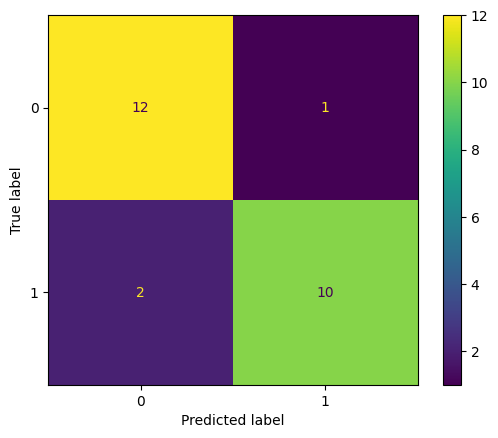

In [193]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [30]:
import sys
import numpy as np
def DistanceMatrixPlotter(matrix: np.array):
    if type(matrix) != type(np.array([])):
        print("Error: please input a numpy array")
    n_dims = len(matrix.shape)
    if n_dims != 2:
        print("Error: the numpy array does not have 2 dimensions")
DistanceMatrixPlotter([1])

<class 'numpy.ndarray'>


'Error: please input a numpy array'

In [84]:
def tsv_array_converter(filepath):
    data = []
    with open(filepath, "r") as f:
        while True:
            line = f.readline()
            row = line.strip("\n").split("\t")
            if line:
                data.append(row)
            else:
                break

    labels = np.array(data[0][1:])
    data_dims = len(data) - 1
    data_array = np.zeros((data_dims, data_dims))
    for i in range(data_dims):
        for j in range(data_dims):
            try:
                data_array[i][j] = data[i+1][j+1]
            except ValueError:
                data_array[i][j] = 100.
    
    return data_array, labels

l, d = tsv_array_converter(os.path.join(os.getcwd(), "Generate_genetic_distance/mtDNA_genetic_distance.tsv"))
print(l)
print(d)

[[100.           0.35820434  15.32668782   1.16810863   0.73789204
    4.00435452   0.52346905   0.58894685   0.82395922   1.16810863
    1.33309662   0.92119912   0.73789204   1.16810863   1.16810863
   15.32668782]
 [  0.35820434 100.          15.32668782   1.33309662   0.52346905
    1.8319603    0.82395922   0.92119912   0.92119912   1.33309662
    1.03612938   1.53867525   0.82395922   1.16810863   0.92119912
   15.32668782]
 [ 15.32668782  15.32668782 100.          15.32668782  15.32668782
   15.32668782  15.32668782  15.32668782  15.32668782  15.32668782
   15.32668782  15.32668782  15.32668782  15.32668782  15.32668782
   15.32668782]
 [  1.16810863   1.33309662  15.32668782 100.           1.8319603
   15.32668782   1.8319603   15.32668782   2.30284186   1.8319603
   15.32668782   2.30284186   1.53867525  15.32668782  15.32668782
   15.32668782]
 [  0.73789204   0.52346905  15.32668782   1.8319603  100.
    1.8319603    1.8319603    1.33309662   1.53867525   1.53867525
    1.33

In [10]:
d = np.array([ 0.          0.35820434 15.32668782  1.16810863  0.73789204  4.00435452
  0.52346905  0.58894685  0.82395922  1.16810863  1.33309662  0.92119912
  0.73789204  1.16810863  1.16810863 15.32668782  0.35820434  0.
 15.32668782  1.33309662  0.52346905  1.8319603   0.82395922  0.92119912
  0.92119912  1.33309662  1.03612938  1.53867525  0.82395922  1.16810863
  0.92119912 15.32668782 15.32668782 15.32668782  0.         15.32668782
 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782
 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782
  1.16810863  1.33309662 15.32668782  0.          1.8319603  15.32668782
  1.8319603  15.32668782  2.30284186  1.8319603  15.32668782  2.30284186
  1.53867525 15.32668782 15.32668782 15.32668782  0.73789204  0.52346905
 15.32668782  1.8319603   0.          1.8319603   1.8319603   1.33309662
  1.53867525  1.53867525  1.33309662  4.00435452  1.33309662  2.30284186
  1.16810863 15.32668782  4.00435452  1.8319603  15.32668782 15.32668782
  1.8319603   0.         15.32668782 15.32668782 15.32668782 15.32668782
 15.32668782 15.32668782  4.00435452 15.32668782 15.32668782 15.32668782
  0.52346905  0.82395922 15.32668782  1.8319603   1.8319603  15.32668782
  0.          0.92119912  1.53867525  1.8319603   1.8319603   1.16810863
  1.33309662  1.53867525  1.8319603  15.32668782  0.58894685  0.92119912
 15.32668782 15.32668782  1.33309662 15.32668782  0.92119912  0.
  1.53867525  1.8319603   1.8319603   1.16810863  1.33309662  1.53867525
  1.53867525  4.00435452  0.82395922  0.92119912 15.32668782  2.30284186
  1.53867525 15.32668782  1.53867525  1.53867525  0.          2.30284186
  4.00435452  2.30284186  0.46473669  0.65876467  2.30284186 15.32668782
  1.16810863  1.33309662 15.32668782  1.8319603   1.53867525 15.32668782
  1.8319603   1.8319603   2.30284186  0.          1.53867525  4.00435452
  1.53867525  4.00435452  1.33309662 15.32668782  1.33309662  1.03612938
 15.32668782 15.32668782  1.33309662 15.32668782  1.8319603   1.8319603
  4.00435452  1.53867525  0.         15.32668782  2.30284186  4.00435452
  0.73789204 15.32668782  0.92119912  1.53867525 15.32668782  2.30284186
  4.00435452 15.32668782  1.16810863  1.16810863  2.30284186  4.00435452
 15.32668782  0.          1.8319603  15.32668782  4.00435452  2.30284186
  0.73789204  0.82395922 15.32668782  1.53867525  1.33309662  4.00435452
  1.33309662  1.33309662  0.46473669  1.53867525  2.30284186  1.8319603
  0.          0.73789204  1.8319603   4.00435452  1.16810863  1.16810863
 15.32668782 15.32668782  2.30284186 15.32668782  1.53867525  1.53867525
  0.65876467  4.00435452  4.00435452 15.32668782  0.73789204  0.
  2.30284186 15.32668782  1.16810863  0.92119912 15.32668782 15.32668782
  1.16810863 15.32668782  1.8319603   1.53867525  2.30284186  1.33309662
  0.73789204  4.00435452  1.8319603   2.30284186  0.          2.30284186
 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782 15.32668782
 15.32668782  4.00435452 15.32668782 15.32668782 15.32668782  2.30284186
  4.00435452 15.32668782  2.30284186  0.        ]

-13.815510557964274

In [3]:
import sys
print(sys.path)

['/usr/lib64/python313.zip', '/usr/lib64/python3.13', '/usr/lib64/python3.13/lib-dynload', '', '/home/inf-33-2025/.local/lib/python3.13/site-packages', '/usr/local/lib64/python3.13/site-packages', '/usr/local/lib/python3.13/site-packages', '/usr/lib64/python3.13/site-packages', '/usr/lib/python3.13/site-packages']


/Users/otodreas/Lund/Courses/MiscExercisesBINP16/RunningExercise3_BINP16/src/partiiiprograms


<Axes: ylabel='Density'>

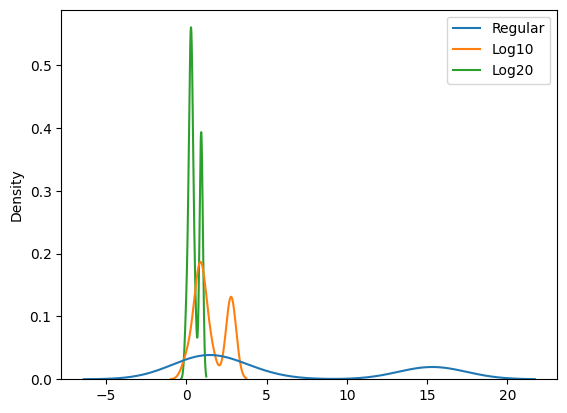

In [43]:
import os
import numpy as np
import pandas as pd
import math
path = "/Users/otodreas/Lund/Courses/MiscExercisesBINP16/RunningExercise3_BINP16/src/partiiiprograms/Generate_genetic_distance/mtDNA_genetic_distance.tsv"
print(os.getcwd())
import seaborn as sns

def tsv_array_converter(filepath):
    data = []
    with open(filepath, "r") as f:
        while True:
            line = f.readline()
            row = line.strip("\n").split("\t")
            if line:
                data.append(row)
            else:
                break
    
    row_lengths = {len(row) for row in data}
    if len(row_lengths) > 1 or row_lengths == {1}:
        sys.exit(f"Delimiter issues. Rows read have length(s) {row_lengths}")
    
    labels = np.array(data[0][1:])
    data_dims = len(data) - 1
    data_array = np.zeros((data_dims, data_dims))
    
    for i in range(data_dims):
        for j in range(data_dims):
            try:
                data_array[i][j] = data[i+1][j+1]
            except ValueError:
                data_array[i][j] = 0.  # this position contains "" in the input data
    
    return data_array, labels
data, labels = tsv_array_converter(path)

data = data.flatten()
log10_data = np.zeros(len(data))
log20_data = np.zeros(len(data))
for i in range(len(data)):
    log10_data[i] = math.log(data[i] + 1)
    log20_data[i]  = math.log(data[i] + 1, 20)

df = pd.DataFrame({"Regular": data, "Log10": log10_data, "Log20": log20_data})
sns.kdeplot(df)
    

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_3154/2867263432.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Accent", 3)
/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_3154/2867263432.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=my_color[num]


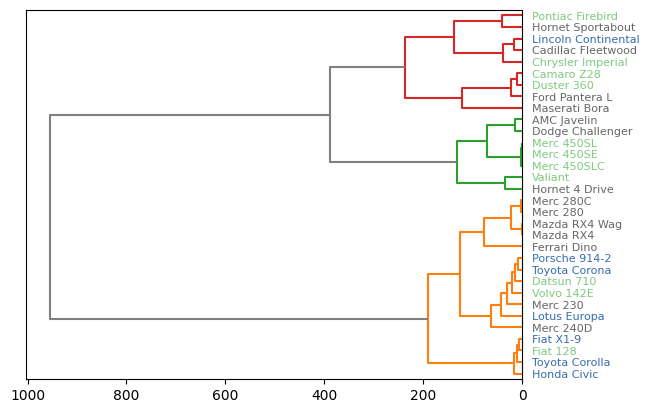

In [45]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')

display(df)
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey')
 
# Create a color palette with 3 colors for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 3)
 
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['cyl']=pd.Categorical(df['cyl'])
my_color=df['cyl'].cat.codes
 
# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
    val=my_color[num]
    lbl.set_color(my_palette(val))

# Show the graph
plt.show()